i:  0
0
70938.44481748658


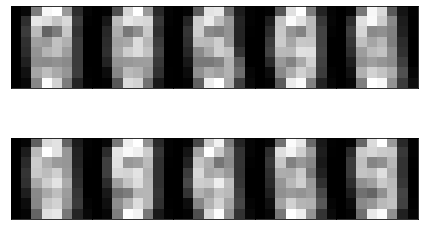

i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
10
100.38636424996366


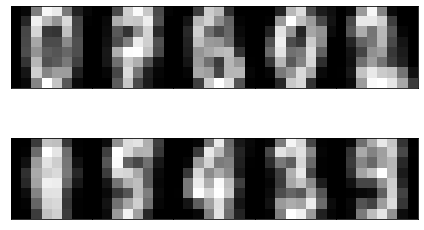

i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
20
0.9490510253235698


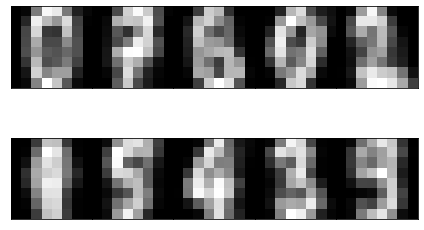

i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
30
0.0004979434743290767


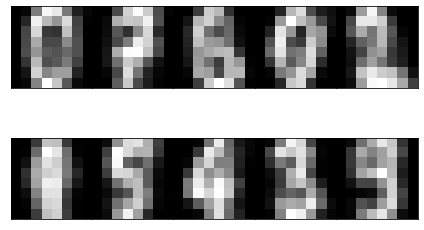

i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
40
7.95643572928384e-05


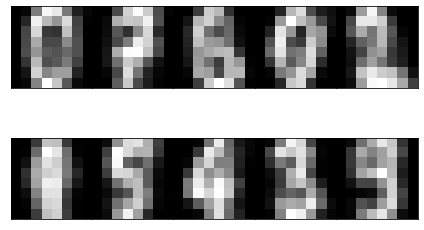

i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
i:  50
50
1.3227647286839783e-05


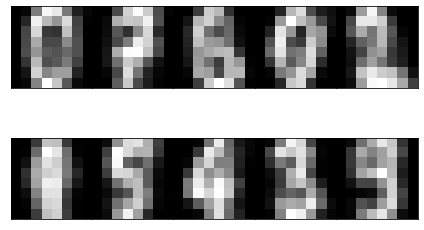

i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
i:  59
i:  60
60
2.214801497757435e-06


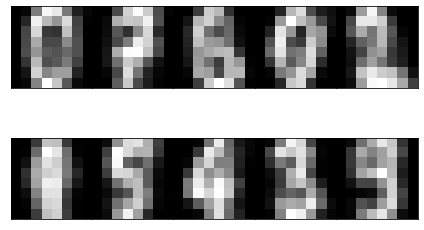

i:  61
i:  62
i:  63
i:  64
i:  65
comp_score:  0.48350441116044873
fit done 66


In [2]:
from test_stuff import GMM
from sklearn import metrics, datasets

digits = datasets.load_digits()

num_examples = len(digits.data)
num_split = int(0.7 * num_examples)

train_features = digits.data[:num_split]
train_labels = digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

gmm = GMM()
gmm.fit(train_features, train_labels)


In [4]:
preds = gmm.predict(test_features)
pred_train = gmm.predict(train_features)

In [3]:
#experiment here
def repair(preds, labels):
    print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(labels, preds)))
    
    print("Confusion matrix GBN:\n%s" % metrics.confusion_matrix(labels, preds))
    print()
    label_set = set(labels.copy())
    print(set(preds))


    for i in range(10):
        
        f1s = []
        

        print("old " ,preds[:20])

        for j in range(10):
            print(i , " > " , j)

            p_copy = list(preds.copy())
            switchero(i, j, p_copy)
            d = metrics.classification_report(labels, p_copy, output_dict = True)
            f1s.append(d[str(i)]['f1-score'])

            
        print(f1s)
        max_index = 0
        max_value = 0
        
        for fi in range(len(f1s)):
            if f1s[fi] > max_value and i in label_set:
                max_value = f1s[fi]
                max_index = fi

        print(max_value)
        
        if max_index in label_set:
            label_set.remove(max_index)
            
        if i in label_set:
            label_set.remove(i)

        
        print( i , " changed to " , max_index)
        print(label_set)
        if max_value is not 0:
            switchero(i, max_index, preds)
        print("new " ,preds[:20])
        
    
        print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(labels, preds)))

        
    
    # for ci in range(len(f1s)):
    #    print(ci , " -> " , np.argmax(f1s[ci]))
    #    print(f1s[ci])
    #    class_mapping.append(np.argmax(f1s[ci]))
    #for c in f1s:
    #    print(c , " -> " , np.argmax(c))
    #    class_mapping.append(np.argmax(c))
    # for p in preds:
    #    p = class_mapping[p]
    # for pi in range(len(preds)):
    #    preds[pi] = class_mapping[preds[pi]]
        
    return preds

def switchero(a, b, in_list):

    for i in range(len(in_list)):
            if in_list[i] == a:
                in_list[i] = b
            elif in_list[i] == b:
                in_list[i] = a  


    return in_list


preds = gmm.predict(test_features)
pred_train = gmm.predict(train_features)
repaired_preds = repair(preds, test_labels)
repaired_train = repair(pred_train, train_labels)

print(set(repaired_preds))


Classification report GBN:
              precision    recall  f1-score   support

           0       0.80      0.45      0.58        53
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        57
           5       0.02      0.02      0.02        56
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        54
           8       0.07      0.06      0.07        52
           9       0.29      0.42      0.35        55

    accuracy                           0.09       540
   macro avg       0.12      0.09      0.10       540
weighted avg       0.12      0.09      0.10       540


Confusion matrix GBN:
[[24  0  0 19  8  0  0  0  2  0]
 [ 0  0  0  0  0 36  0  0  3 14]
 [ 0  0  0  0 42  0  0  0 11  0]
 [ 2  0  5  0  0  0  6  0 20 20]
 [ 0  0  0  9  0 14  2 32  0  0]
 [ 2  0  4  1  0  1 27  0 

In [4]:
import numpy as np

print("set", set(repaired_preds))


print("Test reports:")
print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(test_labels, preds)))
    
print("Confusion matrix GBN:\n%s" % metrics.confusion_matrix(test_labels, preds))

set {0, 1, 2, 4, 5, 6, 7, 8, 9}
Test reports:
Classification report GBN:
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        53
           1       0.00      0.00      0.00        53
           2       0.53      0.77      0.63        53
           3       0.00      0.00      0.00        53
           4       0.67      0.96      0.79        57
           5       0.71      0.52      0.60        56
           6       0.81      0.96      0.88        54
           7       0.67      0.98      0.80        54
           8       0.00      0.00      0.00        52
           9       0.38      0.24      0.29        55

    accuracy                           0.55       540
   macro avg       0.41      0.54      0.45       540
weighted avg       0.42      0.55      0.46       540


Confusion matrix GBN:
[[53  0  0  0  0  0  0  0  0  0]
 [15  0 19  0 18  0  0  1  0  0]
 [ 2  2 41  0  0  0  0  0  8  0]
 [ 4  0 17  0  0  9  0  3  0 20]
 [ 2  0  0  0

In [5]:

print("Training reports:")
print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(train_labels, repaired_train)))
    
print("Confusion matrix GBN:\n%s" % metrics.confusion_matrix(train_labels, repaired_train))
print()


Training reports:
Classification report GBN:
              precision    recall  f1-score   support

           0       0.44      0.98      0.61       125
           1       0.51      0.17      0.26       129
           2       0.54      0.55      0.54       124
           3       0.00      0.00      0.00       130
           4       0.59      0.89      0.71       124
           5       0.42      0.37      0.40       126
           6       0.70      0.88      0.78       127
           7       0.68      0.94      0.79       125
           8       0.15      0.06      0.08       122
           9       0.26      0.18      0.22       125

    accuracy                           0.50      1257
   macro avg       0.43      0.50      0.44      1257
weighted avg       0.43      0.50      0.44      1257


Confusion matrix GBN:
[[123   0   0   0   1   0   1   0   0   0]
 [ 24  22  18  15  40   3   0   6   1   0]
 [  3  12  68   0   0   0   0   0  40   1]
 [  0   0  34   0   0  34   0   1   0  61]
 